# Volvemos a PCA

Estamos repitiendo el ejercicio de [Errodringer](https://www.youtube.com/watch?v=k3CWA2GBb8o)

In [33]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('data/iris.data', header=None)
nombre_col = ['long_sepalo', 'ancho_sepalo', 'long_petalo', 'ancho_petalo', 'clase']
df.columns = nombre_col

In [12]:
df.describe()

,long_sepalo,ancho_sepalo,long_petalo,ancho_petalo
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
df.head()

,long_sepalo,ancho_sepalo,long_petalo,ancho_petalo,clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Podemos ver la matriz de covarianza de los datos de un _DataFrame_

In [31]:
df.cov()

,long_sepalo,ancho_sepalo,long_petalo,ancho_petalo
long_sepalo,0.685694,-0.039268,1.273682,0.516904
ancho_sepalo,-0.039268,0.188004,-0.321713,-0.117981
long_petalo,1.273682,-0.321713,3.113179,1.296387
ancho_petalo,0.516904,-0.117981,1.296387,0.582414


In [30]:
# La convierto a array de numpy para poder seguir jugando, sino te queda tipo DataFrame de Pandas
mat_cov = df.cov().to_numpy()
mat_cov

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

Vamos a plottear algo que tenga covarianza positiva, por ejemplo `long_sepalo` vs `long_petalo`

<AxesSubplot:xlabel='long_sepalo', ylabel='long_petalo'>

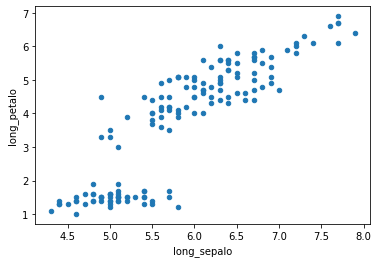

In [23]:
df.plot.scatter('long_sepalo', 'long_petalo')

Se puede ver la tendencia creciente!

Vamos al reves ahora, algo con covarianza negativa: `ancho_sepalo` vs `long_petalo`

<AxesSubplot:xlabel='ancho_sepalo', ylabel='long_petalo'>

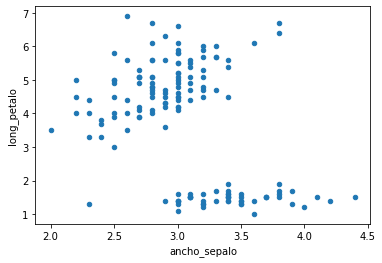

In [25]:
df.plot.scatter('ancho_sepalo', 'long_petalo')

Vamos a averiguar los autovalores y autovectores de la matriz de covarianza

In [55]:
aval, avec = np.linalg.eig(mat_cov)
print(f'Autovalores: {aval}')
print(f'Autovectores: {avec}')
avec_T =  avec.T
# Matriz con autovectores como columnas
avec_T

Autovalores: [4.22484077 0.24224357 0.07852391 0.02368303]
Autovectores: [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])